# -El COVID-19 los resultados países desarrollados vs países en vía de desarrollo

## A medida que la humanidad avanza cada vez más en la implementación de soluciones enfocadas a la recolección de datos y en base a estos tomar decisiones; vemos como cada vez más el científico de datos es útil en distintos lugares donde estos conocimientos y técnicas no eran usadas, y en medio de esta era donde existe un mar de información.  acaeció la pandemia lo que trajo una oportunidad para todas las personas en el campo de trabajar con datos recién generados; esta recolección de datos ha sido realizada en su mayoría por varias entidades de tipo gubernamental en su mayoría ayudados del sector educativo.

## Para el siguiente informe usamos los datos recolectados por la universidad John Hopkins la cual a través de sus facultades de ciencia e ingeniería se encargaron de recopilar los datos provenientes de centros de control de enfermedades, hospitales , fuentes oficiales , reportes epidemiológicos por país , bancos y otras entidades que recopilan información relevante para el análisis del desarrollo de esta crisis de salud publica   

## Link de descarga para el notebook:https://github.com/Codemonster808/Proyecto_Final_Covid_19/blob/main/Proyecto_4_Santiago_Venegas_Zarate.ipynb

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import pylab as plt
import numpy as np
sns.set()
%matplotlib inline
import pylab as plt
from google.colab import drive
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:

#cargamos los datos

drive.mount('/content/gdrive', force_remount=True)

# Aca deben apuntar a la carpeta de su drive donde guardaron los datos
root_dir = "/content/gdrive/MyDrive/Proyecto 4 (Final)"


Mounted at /content/gdrive


In [ ]:
datos=pd.read_csv('/content/gdrive/MyDrive/Proyecto 4 (Final)/covid-tests-cases-deaths.csv')
datos

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
0,Afghanistan,AFG,2020-03-23,NaN,NaN,1.0,40.0
1,Afghanistan,AFG,2020-03-24,NaN,NaN,1.0,42.0
2,Afghanistan,AFG,2020-03-25,NaN,NaN,1.0,74.0
3,Afghanistan,AFG,2020-03-26,NaN,NaN,2.0,80.0
4,Afghanistan,AFG,2020-03-27,NaN,NaN,2.0,91.0
...,...,...,...,...,...,...,...
129532,Zimbabwe,ZWE,2021-11-08,NaN,NaN,4690.0,133205.0
129533,Zimbabwe,ZWE,2021-11-09,NaN,NaN,4691.0,133242.0
129534,Zimbabwe,ZWE,2020-03-20,NaN,NaN,NaN,1.0
129535,Zimbabwe,ZWE,2020-03-21,NaN,NaN,NaN,3.0


In [ ]:
paises = datos['Entity'] #cargo el vector de paises
confirmados = datos['Total confirmed cases of COVID-19'] #carga vector todos los casos confirmados

## Antes de ahondar en los países escogidos para este análisis , vamos a explorar un poco que columnas tiene el dataset como otras medidas estadísticas que nos serán de utilidad después.

In [ ]:
datos.shape

(129537, 7)

In [ ]:
datos1 = datos.copy()

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129537 entries, 0 to 129536
Data columns (total 7 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Entity                                  129537 non-null  object 
 1   Code                                    117502 non-null  object 
 2   Day                                     129537 non-null  object 
 3   total_tests                             56821 non-null   float64
 4   142601-annotations                      55146 non-null   object 
 5   Total confirmed deaths due to COVID-19  116483 non-null  float64
 6   Total confirmed cases of COVID-19       127772 non-null  float64
dtypes: float64(3), object(4)
memory usage: 6.9+ MB


## Vamos a ver la cantidad de valores nulos por columnas 

In [ ]:
for col in datos.columns:
  nulos= datos[col].isna().sum()
  print(col,   "{:.2f}%".format(nulos*100/127314))


Entity 0.00%
Code 9.45%
Day 0.00%
total_tests 57.12%
142601-annotations 58.43%
Total confirmed deaths due to COVID-19 10.25%
Total confirmed cases of COVID-19 1.39%



## Podemos ver la cantidad de valores faltantes por columnas y a través de esto decidimos trabajar con entity y la cantidad total de casos de  



## Para este caso en específico vamos a consultar los datos de Colombia frente a Canada y Noruega basados en esta comparativa decidiremos cual país le dio un mejor manejo al COVID. basados en que estrategias tuvieron y los resultados de estas.


## Seleccionamos Colombia


Text(0, 0.5, 'cantidad de casos')

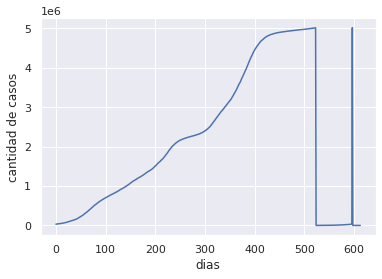

In [ ]:
#seleccionamos Colombia

ind_col=np.where(paises=='Colombia')
ind_col=ind_col[0]
casos_col=confirmados[ind_col]
dias=np.arange(0,len(casos_col))
plt.plot(dias,casos_col)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

## Seleccionamos Noruega


Text(0, 0.5, 'cantidad de casos')

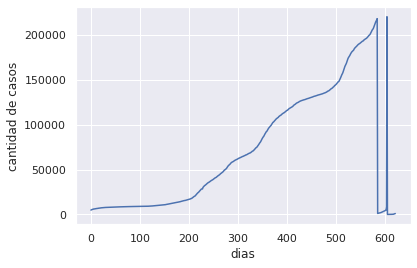

In [ ]:
ind_nor=np.where(paises=='Norway')
ind_nor=ind_nor[0]
casos_nor=confirmados[ind_nor]
diasN=np.arange(0,len(casos_nor))
plt.plot(diasN,casos_nor)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

## Seleccionamos Canadá

Text(0, 0.5, 'cantidad de casos')

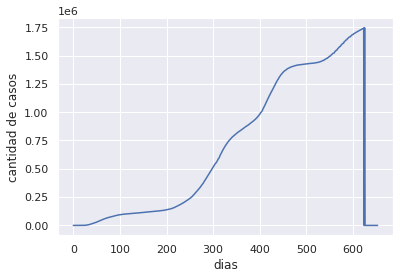

In [ ]:
ind_can=np.where(paises=='Canada')
ind_can=ind_can[0]
casos_can=confirmados[ind_can]
diasC=np.arange(0,len(casos_can))
plt.plot(diasC,casos_can)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

##Estas son las curvas de **casos totales** de Colombia Noruega y Canadá. Aquí no se ven las olas, ya que estas se ven en la curva de casos confirmados por día, es decir, de casos nuevos. Esta habla de los acumulados, entonces siempre se agregan.

##Para ver mejor la curva, podemos tomar el logaritmo de los datos. Una curva exponencial se ve lineal en escala logarítmica



## Colombia

Text(0, 0.5, 'log cantidad de casos')

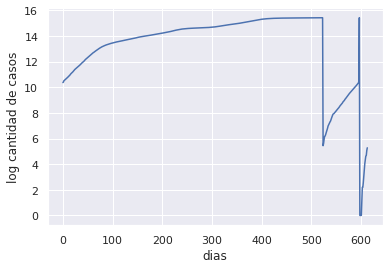

In [ ]:
plt.plot(dias,np.log(casos_col))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

## Noruega

Text(0, 0.5, 'log cantidad de casos')

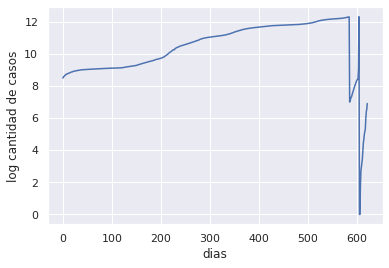

In [ ]:
plt.plot(diasN,np.log(casos_nor))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

## Canada

Text(0, 0.5, 'log cantidad de casos')

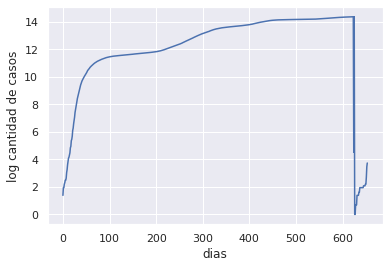

In [ ]:
plt.plot(diasC,np.log(casos_can))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

## Veamos lo que pasa en los primeros 60 días desde que se detectó el   primer caso en Colombia,Noruega y Canadá para ver cómo fue el     $k$     inicial y de que manera se comporta esta constante a travez del tiempo. 

## Colombia

Text(0, 0.5, 'cantidad de casos')

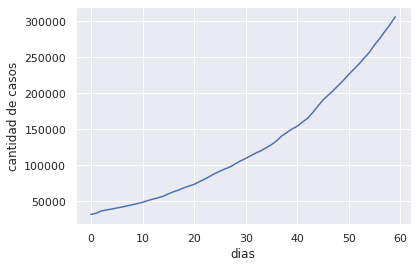

In [ ]:
casos_principio=casos_col[0:60]
dias_principio=dias[0:60]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

## Noruega

Text(0, 0.5, 'cantidad de casos')

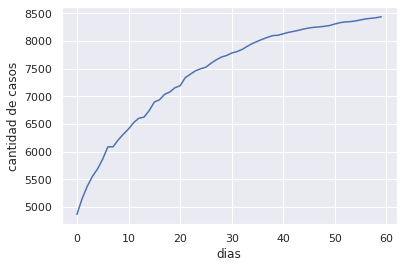

In [ ]:
casos_principioN=casos_nor[0:60]
dias_principioN=diasN[0:60]

plt.plot(dias_principioN,casos_principioN)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

## Canadá

Text(0, 0.5, 'cantidad de casos')

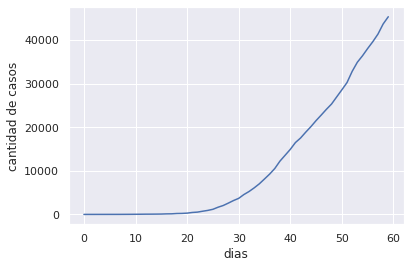

In [ ]:
casos_principioC=casos_can[0:60]
dias_principioC=diasC[0:60]

plt.plot(dias_principioC,casos_principioC)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

## Es difícil determinar si esta parte es exponencial. Analicemos qué pasa en escala logarítmica de cada pais 




## Colombia

Text(0, 0.5, 'log cantidad de casos')

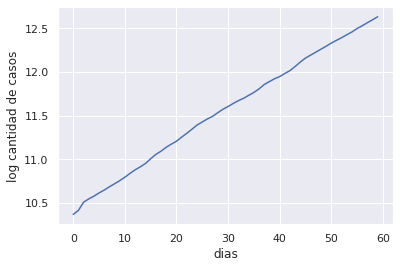

In [ ]:

plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

## Noruega

Text(0, 0.5, 'log cantidad de casos')

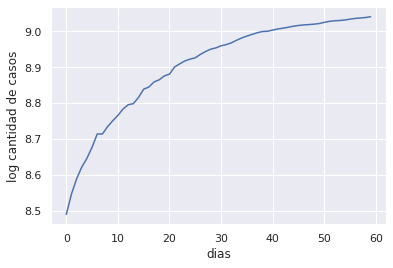

In [ ]:
plt.plot(dias_principioN,np.log(casos_principioN))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

## Canadá 

Text(0, 0.5, 'log cantidad de casos')

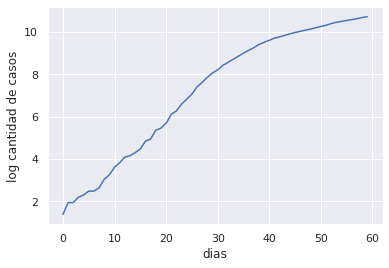

In [ ]:
plt.plot(dias_principioC,np.log(casos_principioC))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

Mejor nos quedamos con lo que sucede entre los días 31 y 55, ya que ese fue el comportamiento más sostenido.

## Colombia 

Text(0, 0.5, 'cantidad de casos')

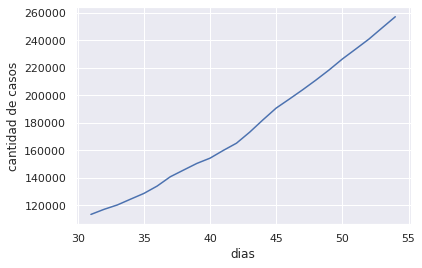

In [ ]:
casos_principio=casos_col[31:55]
dias_principio=dias[31:55]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

## Noruega

Text(0, 0.5, 'cantidad de casos')

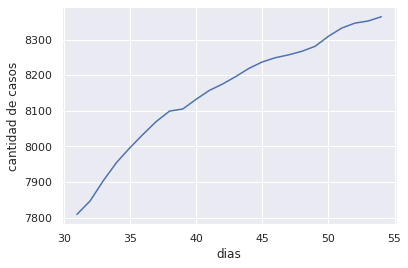

In [ ]:
casos_principioN=casos_nor[31:55]
dias_principioN=diasN[31:55]

plt.plot(dias_principioN,casos_principioN)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

## Canadá


Text(0, 0.5, 'cantidad de casos')

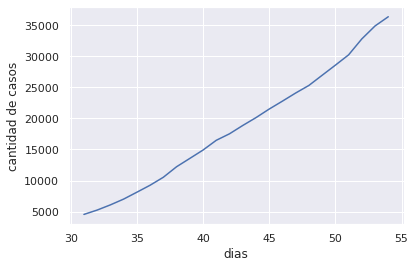

In [ ]:
casos_principioC=casos_can[31:55]
dias_principioC=diasC[31:55]

plt.plot(dias_principioC,casos_principioC)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

## Vamos ahora a pasar las graficas a escala logaritmica para facilitar la visualzacion. 

## Colombia

Text(0, 0.5, 'log cantidad de casos')

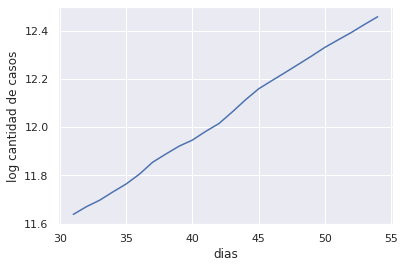

In [ ]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

## Noruega

Text(0, 0.5, 'log cantidad de casos')

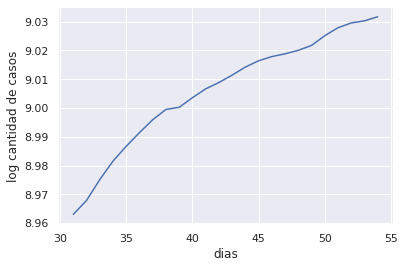

In [ ]:
plt.plot(dias_principioN,np.log(casos_principioN))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

## Canadá

Text(0, 0.5, 'log cantidad de casos')

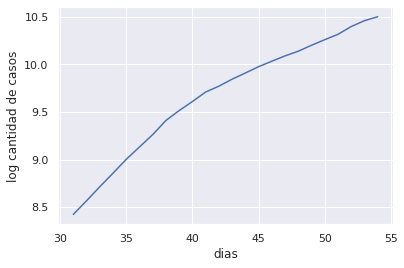

In [ ]:
plt.plot(dias_principioC,np.log(casos_principioC))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

¡Se ve bastante lineal! Aprovechemos esto para averiguar el $k$ utilizando un ajuste hecho con el método de cuadrados mínimos, ajustando los datos al modelo 

$Confirmados=e^{k(t-t_0)}$



In [ ]:
#definimos función para ajustar modelo
def exponencial(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

In [ ]:
#Colombia
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio,maxfev=1000)
popt

array([ 3.64596464e-02, -2.88000213e+02])

In [ ]:
popt

array([ 3.64596464e-02, -2.88000213e+02])

In [ ]:
pcov

array([[1.02138308e-07, 9.35187426e-04],
       [9.35187426e-04, 8.56583811e+00]])

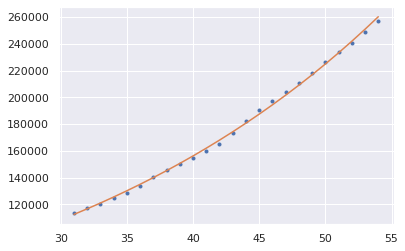

In [ ]:
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)

## $k$ de Colombia 

In [ ]:
kc = k
kc

0.036459646422087225

In [ ]:
#Noruega
popt, pcov = curve_fit(exponencial, dias_principioN, casos_principioN,maxfev=1000)
popt

array([ 2.73154022e-03, -3.25456488e+03])

In [ ]:
popt

array([ 2.73154022e-03, -3.25456488e+03])

In [ ]:
pcov

array([[1.95726169e-08, 2.36267136e-02],
       [2.36267136e-02, 2.85206652e+04]])

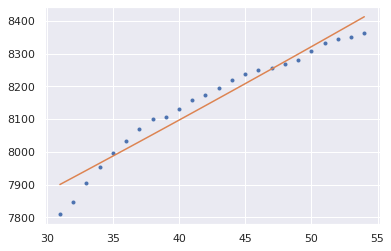

In [ ]:
k=popt[0]
t0=popt[1]
casos_simuN=exponencial(dias_principioN,k,t0)
plt.plot(dias_principioN,casos_principioN,'.')
plt.plot(dias_principioN,casos_simuN)

## $k$ de Noruega 


In [ ]:
kn = k
kn

0.002731540222401003

In [ ]:
#Canada
popt, pcov = curve_fit(exponencial, dias_principioC, casos_principioC,maxfev=1000)
popt

array([ 7.23994152e-02, -9.17425089e+01])

In [ ]:
popt

array([ 7.23994152e-02, -9.17425089e+01])

In [ ]:
pcov

array([[7.27875022e-06, 1.40847415e-02],
       [1.40847415e-02, 2.72944201e+01]])

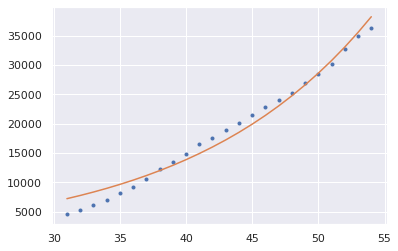

In [ ]:
k=popt[0]
t0=popt[1]
casos_simuC=exponencial(dias_principioC,k,t0)
plt.plot(dias_principioC,casos_principioC,'.')
plt.plot(dias_principioC,casos_simuC)

## $k$ de Canadá 


In [ ]:
kca = k
kca

0.07239941523135933

In [ ]:
ks = [kc,kn,kca]
ks = pd.DataFrame(ks)

In [ ]:
ks.describe()

,0
count,3.000000
mean,0.037197
std,0.034840
min,0.002732
25%,0.019596
50%,0.036460
75%,0.054430
max,0.072399


## Vamos ahora a generar un intervalo de confianza para nuestras predicciones 

In [ ]:

mu_ks=np.mean(ks)
sigma_ks=np.std(ks)
z=1.96
n100=len(ks)
int_conf= [mu_ks-z*sigma_ks/np.sqrt(n100),mu_ks+z*sigma_ks/np.sqrt(n100)]
print(f"{int_conf }")
print(f"{(int_conf[1] - int_conf[0])}")



[0    0.005007
dtype: float64, 0    0.069387
dtype: float64]
0    0.064381
dtype: float64


## Vemos entonces que el intervalo de confianza de confianza de $k$  para los 3 paises escogidos se encuentra entre [0.005007 , 0.069387] con una diferencia  de 0.064381 entre los valores del intervalo  

## El criterio de selección para este análisis fue el tratar de contrastar países con una alta inversión en bienestar social versus países con políticas de corte neoliberal, así como países con una alta afluencia de viajeros provenientes de EEUU y de esta manea poder hacer una radiografía de cuales fueron sus estrategias y quienes tuvieron un mejor manejo de la crisis 

## El $k$ promedio obtenido para este análisis fue de 0.037197 , que como tal para un análisis del k mundial no sería representativo ya que  de factores políticos , sociales y económicos dependió el manejo de la crisis en cada país;  pero si es representativo para contrastar el efecto de políticas económicas que rigen la salud y en vez de democratizarla la mercantiliza; aparte de poder evidenciar la asimetría entre países que tienen impuestos a la riqueza y bajos sueldos parlamentarios a los que tienen menos regulación y “libertad económica”

## Vamos ahora ahora a comparar el $k$ entre los paises escogidos

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


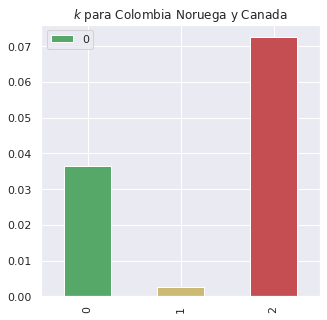

In [ ]:

ks.plot(kind="bar",color ='g''y''r',figsize=(5,5),title='$k$ para Colombia Noruega y Canada')


## Podemos observar de este grafico que el $k$ más alto para el periodo escogido fue para Canadá seguido por Colombia y después por Noruega. y como es mencionado anteriormente los efectos de políticas depredadoras de la salud de los mas vulnerables mas el proteccionismo de los gobiernos con corporaciones se evidencia desde el principio de este evento 
  




# -Politicas publicas 

## Para esta parte del análisis vamos a comparar países que fueron más laxos en sus restricciones y solo aplicaron cuarentenas regionales o por ciudad, contra los que fueron más estrictos y tuvieron cuarentenas nacionales y para poder comparar entre estas políticas vamos a necesitar indicadores para este análisis  usaremos la cantidad de casos y la cantidad de test como el X  de nuestros modelos  y la cantidad de muertes normalizadas a 100k habitantes y convertida en 1 o 0 dependiendo del rango definido por el CDC  donde si esta por debajo de 100  casos por cada 100 mil habitantes entonces el número será 1(funciono la política) y si está por encima de será 0(no funciono la política) la informacion del CDC la pueden copnsultar en https://www.cdc.gov/coronavirus/2019-ncov/travelers/how-level-is-determined.html.

###-Cuarentenas Nacionales
    Colombia 
    Belgica 
    Argentina
    Francia
    Italia

##-Cuarentenas regionales o por ciudad 
    Alemania
    Finlandia
    Japon
    Rusia
    brasil


## Vamos ahora a contruir los dataset con la informacion de los paises escogidos para este analisis

In [ ]:
datos1 = datos.copy()
datos1 = datos1[["Entity","Total confirmed cases of COVID-19","Total confirmed deaths due to COVID-19","total_tests"]]

In [ ]:
datos1 = datos1[datos1.Entity.isin(['Colombia','Belgium','Argentina','France','Italy'])]




In [ ]:
datos_nacional = datos1.copy()



## Creamos un diccionario para la normalización de los datos 

In [ ]:
countries1 = {"Colombia": 50882891, "Belgium": 11589623,"Argentina":45195774,"France":65273511,"Italy":60461826}


In [ ]:
datos_nacional["normalized_casesx100k"] = datos_nacional.apply(lambda row: row["Total confirmed deaths due to COVID-19"]/ countries1.get(row.Entity) * 100000, axis=1)

In [ ]:

def binario1 (fila): 
  if fila < 100 :
     return 1
  else : 
     return 0 

In [ ]:
datos_nacional["binario1"] = datos_nacional["normalized_casesx100k"].map(binario1)

In [ ]:
datos_nacional.head()

,Entity,Total confirmed cases of COVID-19,Total confirmed deaths due to COVID-19,total_tests,normalized_casesx100k,binario1
4333,Argentina,NaN,NaN,4.0,NaN,0
4334,Argentina,NaN,NaN,53.0,NaN,0
4335,Argentina,NaN,NaN,58.0,NaN,0
4336,Argentina,NaN,NaN,133.0,NaN,0
4337,Argentina,NaN,NaN,146.0,NaN,0


In [ ]:
for col in datos_nacional.columns:
  nulos= datos_nacional[col].isna().sum()
  print(col,   "{:.2f}%".format(nulos*100/3226))

Entity 0.00%
Total confirmed cases of COVID-19 1.39%
Total confirmed deaths due to COVID-19 4.49%
total_tests 24.98%
normalized_casesx100k 4.49%
binario1 0.00%


In [ ]:
datos_nacional.fillna(0,inplace = True)

## Ya con nuestros dataset construido para los países que aplicaron cuarentenas nacionales vamos a construir el clasificador de este.


In [ ]:
X = datos_nacional[["normalized_casesx100k"]]
Y = datos_nacional["binario1"]

In [ ]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state=0)

In [ ]:

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear')
classifier.fit(X_Train, Y_Train)

SVC(kernel='linear')

In [ ]:
Y_Pred = classifier.predict(X_Test)

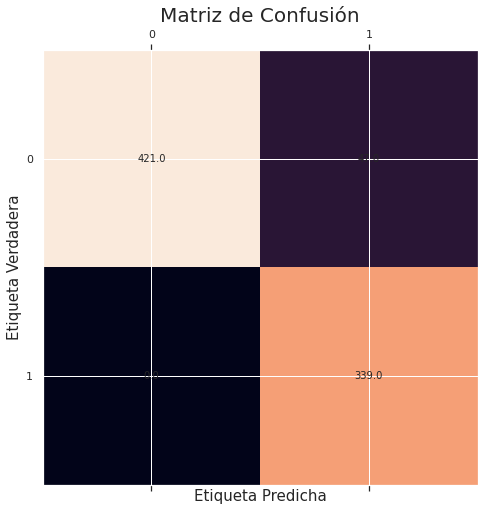

In [ ]:
# Matriz de confusión 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_Test, Y_Pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [ ]:
# Reporte de Clasificación
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       468
           1       0.88      1.00      0.94       339

    accuracy                           0.94       807
   macro avg       0.94      0.95      0.94       807
weighted avg       0.95      0.94      0.94       807



## Ya tenemos el primer clasificador ahora vamos con los datos de paises que no aplicaron cuarentenas nacionales.

In [ ]:
datos2 = datos.copy()
datos2 = datos2[["Entity","Total confirmed cases of COVID-19","Total confirmed deaths due to COVID-19","total_tests"]]

In [ ]:
datos2 = datos2[datos2.Entity.isin(['Germany','Finland','Japan','Rusia','Brazil'])]


In [ ]:
datos_regional = datos2.copy()

In [ ]:
countries2 ={"Germany":83783942,"Finland":5531000,"Japan":126476461,"Rusia":145934462,"Brazil":212559417}

In [ ]:
datos_regional["normalized_casesx100k"] = datos_regional.apply(lambda row: row["Total confirmed deaths due to COVID-19"]/ countries2.get(row.Entity) * 100000, axis=1)

In [ ]:
def binario2 (fila): 
  if fila < 100 :
     return 1
  else : 
     return 0 

In [ ]:
datos_regional["binario2"] = datos_regional["normalized_casesx100k"].map(binario2)

In [ ]:
for col in datos_regional.columns:
  nulos= datos_regional[col].isna().sum()
  print(col,   "{:.2f}%".format(nulos*100/2585))

Entity 0.00%
Total confirmed cases of COVID-19 0.00%
Total confirmed deaths due to COVID-19 5.26%
total_tests 47.27%
normalized_casesx100k 5.26%
binario2 0.00%


In [ ]:
datos_regional.fillna(0,inplace = True)

In [ ]:
X = datos_regional[["normalized_casesx100k"]]
Y = datos_regional["binario2"]  

In [ ]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state=0)

In [ ]:
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [ ]:
classifier = SVC(kernel='linear')
classifier.fit(X_Train, Y_Train)

SVC(kernel='linear')

In [ ]:

Y_Pred1 = classifier.predict(X_Test)

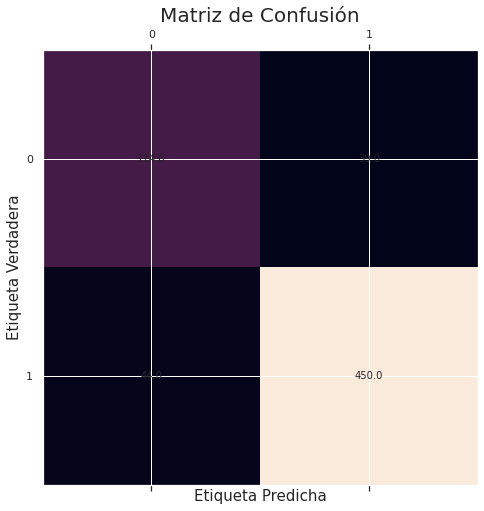

In [ ]:
# Matriz de confusión 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_Test, Y_Pred1)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [ ]:
print(classification_report(Y_Test, Y_Pred1))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       153
           1       0.92      0.91      0.92       494

    accuracy                           0.87       647
   macro avg       0.82      0.83      0.82       647
weighted avg       0.87      0.87      0.87       647



## Ya tenemos nuestros modelos para cada política publica vamos ahora a construir una regresión logística en base a la informacion de los 2 grupos.

In [ ]:
datos3 = datos.copy()
datos3 = datos3[["Entity","Total confirmed cases of COVID-19","Total confirmed deaths due to COVID-19","total_tests"]]

In [ ]:
datos3 = datos3[datos3.Entity.isin(['Colombia','Belgium','Argentina','France','Italy',
'Germany','Finland','Japan','Rusia','Brazil'])]

In [ ]:
datos3.shape

(5811, 4)

In [ ]:

for col in datos3.columns:
  nulos= datos3[col].isna().sum()
  print(col,   "{:.2f}%".format(nulos*100/5811))

Entity 0.00%
Total confirmed cases of COVID-19 0.77%
Total confirmed deaths due to COVID-19 4.84%
total_tests 34.90%


In [ ]:
datos3.fillna(0,inplace = True)

In [ ]:
countries = {"Colombia": 50882891, "Belgium": 11589623,"Argentina":45195774,"France":65273511,"Italy":60461826,"Germany":83783942,"Finland":5531000,"Japan":126476461,"Rusia":145934462,"Brazil":212559417}

In [ ]:
datos3["normalized_casesx100k"] = datos3.apply(lambda row: row["Total confirmed deaths due to COVID-19"]/ countries.get(row.Entity) * 100000, axis=1)

In [ ]:
datos3.head()

,Entity,Total confirmed cases of COVID-19,Total confirmed deaths due to COVID-19,total_tests,normalized_casesx100k
4333,Argentina,0.0,0.0,4.0,0.0
4334,Argentina,0.0,0.0,53.0,0.0
4335,Argentina,0.0,0.0,58.0,0.0
4336,Argentina,0.0,0.0,133.0,0.0
4337,Argentina,0.0,0.0,146.0,0.0


In [ ]:
def binario (fila): 
  if fila < 100 :
     return 1
  else : 
     return 0 

In [ ]:
binario(1000)

0

In [ ]:
datos3["binario"] = datos3["normalized_casesx100k"].map(binario)

In [ ]:
datos3.head()

,Entity,Total confirmed cases of COVID-19,Total confirmed deaths due to COVID-19,total_tests,normalized_casesx100k,binario
4333,Argentina,0.0,0.0,4.0,0.0,1
4334,Argentina,0.0,0.0,53.0,0.0,1
4335,Argentina,0.0,0.0,58.0,0.0,1
4336,Argentina,0.0,0.0,133.0,0.0,1
4337,Argentina,0.0,0.0,146.0,0.0,1


## Ahora que ya tenemos los datos de los 2 grupos de paises normalizados a la cantidad de casos por cada 100 mil habitantes, vamops ahora a contruir una regresion logistica 


Text(0, 0.5, 'Binario')

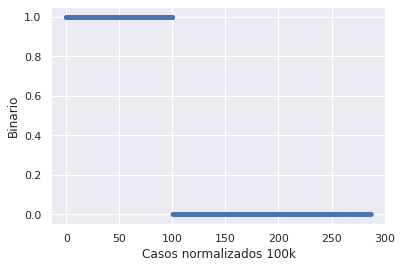

In [ ]:
X = datos3[["normalized_casesx100k"]]
Y = datos3["binario"]
plt.plot(X,Y,'.')
plt.xlabel('Casos normalizados 100k')
plt.ylabel('Binario')

In [ ]:
X['normalized_casesx100k'].shape

(5811,)

In [ ]:
Y.shape

(5811,)

In [ ]:
def sigmoidea(x, x0, k):
    y = 1 / (1 + np.exp(-k*(x-x0)))
    return (y)



## Vamos ahora a entrenar la funcion sigmoide que definimos con la funcion de Scy-py curvefit 

In [ ]:
p0 = [np.median(X), 1] # punto de partida para los parámetros

popt, pcov = curve_fit(f=sigmoidea, xdata=X['normalized_casesx100k'], ydata=Y, p0=p0, method='dogbox') #hago fiteo
print(popt)

[ 99.9565696  -92.40606213]


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Text(0, 0.5, 'binario')

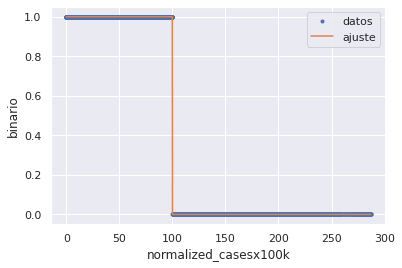

In [ ]:
sigmoidea=np.vectorize(sigmoidea) #asi puedo poner un x que sea vector y sabe que tiene que hacer el barrido por indices
x_plot=np.arange(min(X['normalized_casesx100k']),max(X['normalized_casesx100k']),0.1)
Y_ajustado=sigmoidea(x_plot,popt[0],popt[1])

plt.plot(X,Y,'.',label="datos")
plt.plot(x_plot,Y_ajustado,label="ajuste")
plt.legend()
plt.xlabel('normalized_casesx100k')
plt.ylabel('binario')

## ¿Qué clasificador funciono mejor? ¿Qué política funciono mejor? desde el punto de vista técnico el clasificador que mejor funciono fue el del primer grupo de países (cuarentenas nacionales) con una precisión de del 94% para predecir si iba a ser 1 o 0 (100 casos por cada 100k habitantes o no) ya desde el punto de vista de políticas públicas el grupo que tuvo la mayor cantidad de días positivos con menos de casos, fueron los que solo aplicaron cuarentenas regionales y por ciudades ya en este análisis habría que tener en cuenta  otros factores, como en qué región del mundo se encuentra la mayoría de países de cada grupo así como que tipo de gobiernos priman y este factor es muy importante ya que del tipo de gobierno deriva con cuanta celeridad y que tipo de medidas se tomaron para frenar el paso del virus, es entonces donde podemos identificar un patrón en nuestra información y es que los países que tomaron medidas tempranas como Alemania, Finlandia o Japón lograron mantener más tiempo los casos por debajo del límite aceptado mientras que países como Colombia o Argentina o Italia no tomaron medidas con tanta rapidez como los otros países por lo que fueron mas afectados por este suceso.

## ¿Qué preguntas nacen del trabajo ya realizado?  Queda para profundizar de este ejercicio la realización de una      clasificación de que tipo de gobierno hay por cada país y en base a esto medir la respuesta de los países en usando la cantidad de muertes totales como indicador 
